In [1]:
import numpy as np
import pandas as pd
import h5py 
import keras
from keras.models import Sequential 
from keras.layers import Dense,Activation,Flatten
from tensorflow.keras.optimizers import Adam,SGD
from keras import backend as k
from keras.metrics import Precision,Recall,AUC,SensitivityAtSpecificity,SpecificityAtSensitivity
import tensorflow as tf
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve,roc_auc_score

In [2]:
test = h5py.File("test.h5", "r")
train = h5py.File("train.h5", "r")
X_test = np.array(test['X'])
y_test=np.array(test['y'])
X_train = np.array(train['X'])
y_train = np.array(train['y'])
val = h5py.File("val.h5", "r")
X_val = np.array(val['X'])
y_val = np.array(val['y'])

In [3]:
X_test = X_test/255
X_train = X_train/255
X_val = X_val/255

In [4]:
import matplotlib.pyplot as plt

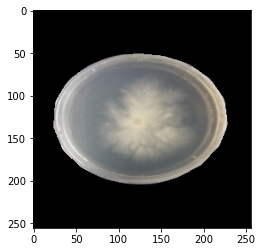

In [5]:
plt.imshow(X_test[7])

In [6]:
from keras.applications.vgg16 import VGG16

pretrain = VGG16(weights="imagenet", include_top=False, input_shape=(256, 256, 3))

2022-11-01 23:20:39.030430: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-11-01 23:20:39.030720: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1 Max


In [7]:
pretrain.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [8]:
model= Sequential()
model.add(pretrain)
model.add(Flatten())
model.add(Dense(1,activation='sigmoid',input_shape=(466,1)))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 8, 8, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 32768)             0         
                                                                 
 dense (Dense)               (None, 1)                 32769     
                                                                 
Total params: 14,747,457
Trainable params: 14,747,457
Non-trainable params: 0
_________________________________________________________________


In [10]:
metrics=[Recall(name='recall'),Precision(name='precision'),AUC(name='auc')]
model.compile(optimizer=SGD(learning_rate=0.1),loss=keras.losses.BinaryCrossentropy(from_logits=True),metrics=metrics)

In [13]:
history=model.fit(X_train,y_train,epochs=10,validation_data=(X_val,y_val), steps_per_epoch=14)

Epoch 1/10
14/14 [==============================] - 9s 670ms/step - loss: 0.4655 - recall: 1.0000 - precision: 0.8240 - auc: 0.5000 - val_loss: 0.5433 - val_recall: 1.0000 - val_precision: 0.7730 - val_auc: 0.5000
Epoch 2/10
14/14 [==============================] - 9s 649ms/step - loss: 0.4654 - recall: 1.0000 - precision: 0.8240 - auc: 0.4703 - val_loss: 0.5435 - val_recall: 1.0000 - val_precision: 0.7730 - val_auc: 0.5000
Epoch 3/10
14/14 [==============================] - 9s 645ms/step - loss: 0.4654 - recall: 1.0000 - precision: 0.8240 - auc: 0.4696 - val_loss: 0.5435 - val_recall: 1.0000 - val_precision: 0.7730 - val_auc: 0.5000
Epoch 4/10
14/14 [==============================] - 9s 644ms/step - loss: 0.4656 - recall: 1.0000 - precision: 0.8240 - auc: 0.5000 - val_loss: 0.5436 - val_recall: 1.0000 - val_precision: 0.7730 - val_auc: 0.5000
Epoch 5/10
14/14 [==============================] - 9s 637ms/step - loss: 0.4655 - recall: 1.0000 - precision: 0.8240 - auc: 0.5000 - val_loss: 

In [14]:
model.evaluate(X_test,y_test)

6/6 [==============================] - 1s 153ms/step - loss: 0.5362 - recall: 1.0000 - precision: 0.7778 - auc: 0.5000


[0.5362385511398315, 1.0, 0.7777777910232544, 0.5]

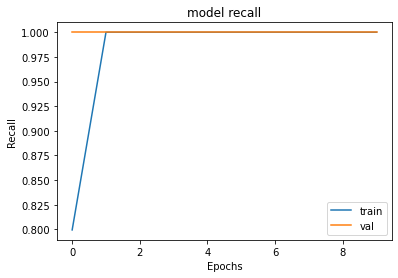

In [33]:
fig1,ax1=plt.subplots()
ax1.plot(history.history['recall'],label='train')
ax1.plot(history.history['val_recall'],label='val')
plt.title('model recall')
plt.ylabel('Recall')
plt.xlabel('Epochs')
plt.legend()